## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

## data

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## null

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
top_null_columns = df.isnull().sum().sort_values(ascending=False).head(20)
print(top_null_columns)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64


<Axes: >

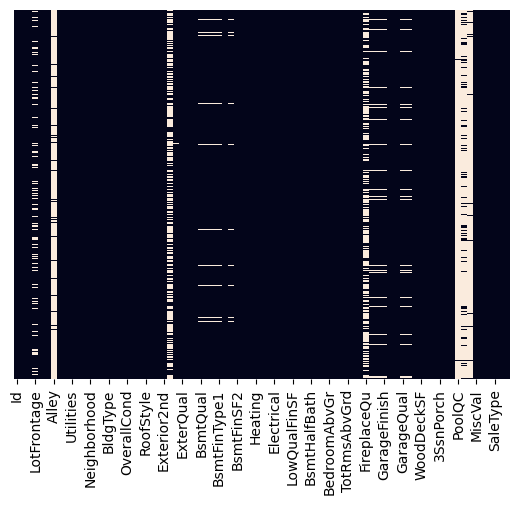

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

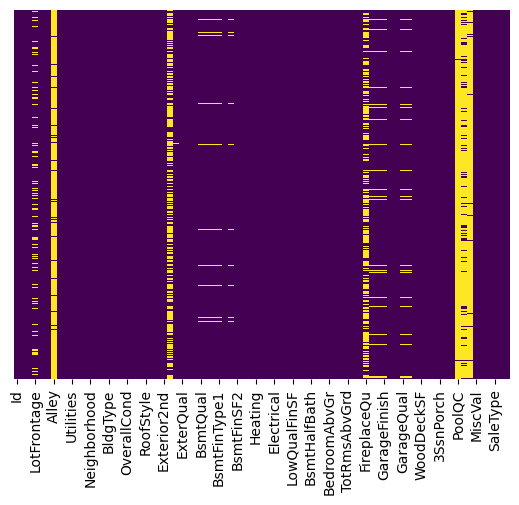

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [9]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Assuming df is your DataFrame
top_null_columns = df.isnull().sum().sort_values(ascending=False).head(7).index
df_cleaned = df.drop(columns=top_null_columns)

# Print the remaining columns with missing values after dropping the top 5
print(df_cleaned.isnull().sum())


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64


In [12]:
top_null_columns = df.isnull().sum().sort_values(ascending=False).head(20)
print(top_null_columns)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64


In [13]:
df_cleaned.shape

(1460, 74)

In [14]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [15]:
df.drop(['Alley'],axis=1,inplace=True)

In [16]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [17]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [18]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [19]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [20]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [21]:
df.shape

(1460, 76)

In [22]:
df.drop(['Id'],axis=1,inplace=True)

In [23]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [24]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<Axes: >

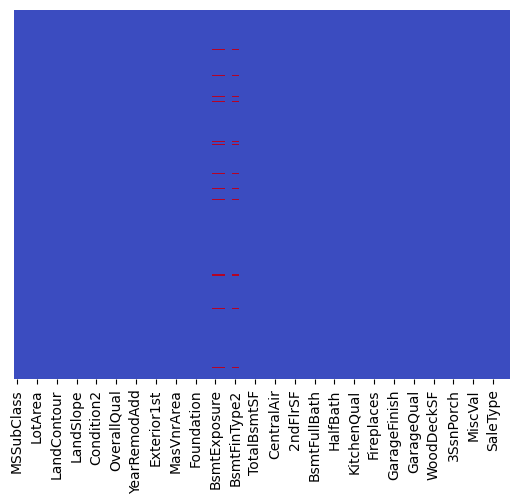

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [26]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<Axes: >

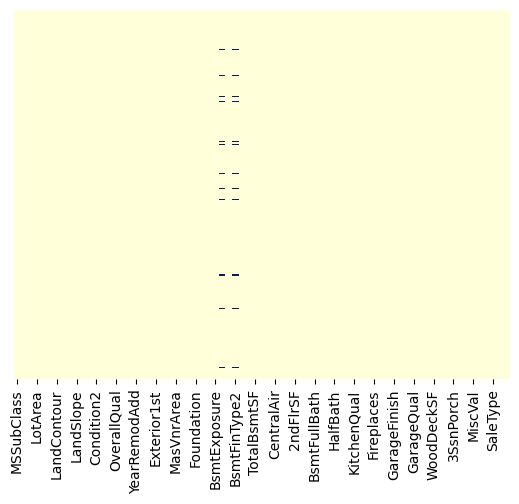

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [28]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(1422, 75)

In [31]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [32]:
##HAndle Categorical Features

In [33]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [34]:
len(columns)

39

In [35]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [36]:
main_df=df.copy()

In [37]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [38]:
test_df.shape

(1459, 74)

In [39]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [40]:
final_df=pd.concat([df,test_df],axis=0)

In [41]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [42]:
final_df.shape

(2881, 75)

In [43]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [44]:
final_df.shape

(2881, 234)

In [45]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [46]:
final_df.shape

(2881, 174)

In [47]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,True,True,False,False,False,False,False,False
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,True,False,False,False,True,False,False,False
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,True,False,False,False,False,True,False,False
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,True,True,False,False,False,False,False,False


In [48]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [49]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [50]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,True,True,False,False,False,False,False,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,True,True,False,False,False,False,False,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,True,True,False,False,False,False,False,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,True,True,False,False,False,False,False,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [51]:
df_Train.shape

(1422, 174)

In [52]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/var/folders/bv/c7b6nvgj05s7ftxp8534dp0w0000gn/T/ipykernel_21559/3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [53]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


In [54]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [55]:
y_train.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

## Prediciton and selecting the Algorithm

In [56]:
import xgboost
classifier=xgboost.XGBRegressor()

In [57]:
import xgboost
regressor=xgboost.XGBRegressor()

In [58]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [59]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [60]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [61]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:17:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } ar

/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:17:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:17:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } ar

/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } ar

/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } ar

/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } ar

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [62]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [65]:
regressor.fit(X_train,y_train)

/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:40] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/lavanya/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [02:18:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=2,
             max_leaves=None, min_child_weight=1, missing=None,
             monotone_constraints=None, multi_strategy=None, n_estimators=900,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [66]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [67]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

KeyError: "['SalePrice'] not found in axis"

In [ ]:
df_Test.shape

In [ ]:
df_Test.head()

In [ ]:
df_Test.drop(['SalePrice'],axis=1).head()

In [ ]:
y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

In [ ]:
y_pred

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## Step2

In [ ]:
pred.columns=['SalePrice']

In [ ]:
temp_df=df_Train['SalePrice'].copy()

In [ ]:
temp_df.column=['SalePrice']

In [ ]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [ ]:
df_Test.head()

In [ ]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [ ]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [ ]:
df_Train.shape

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Artificial Neural Network Implementation

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

In [ ]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-17433.286, test=-20184.846) total time=   1.3s
[CV 1/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2254.015, test=-15572.884) total time=   0.7s
[CV 4/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2524.208, test=-14091.488) total time=   0.7s
[CV 1/5] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=900;, score=(train=-11.163, test=-16380.983) total time=   2.9s
[CV 2/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=1500;, score=(train=-3541.630, test=-17774.702) total time=   0.7s
[CV 5/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=1

[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-16955.189, test=-21495.145) total time=   1.3s
[CV 3/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2252.240, test=-17348.653) total time=   0.7s
[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-17907.048, test=-18312.593) total time=   0.4s
[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-16650.444, test=-22534.619) total time=   0.4s
[CV 2/5] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=900;, score=(train=-17.984, test=-17669.982) total time=   2.7s
[CV 1/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_esti

[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-16415.471, test=-22403.629) total time=   1.3s
[CV 2/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2189.425, test=-16662.812) total time=   0.7s
[CV 5/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimators=1100;, score=(train=-2327.879, test=-18090.287) total time=   0.7s
[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=500;, score=(train=-15676.038, test=-21393.986) total time=   0.4s
[CV 4/5] END base_score=0.5, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=900;, score=(train=-11.569, test=-14479.159) total time=   2.7s
[CV 3/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators